In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("student.csv")
df

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,5141,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,141,5142,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,142,5143,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,143,5144,22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


In [4]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,1,0,2,1,0,1,0,1,1,2,1,0,0
1,1,5002,20,1,0,2,1,0,1,0,1,1,1,2,1,0
2,2,5003,21,1,2,2,0,0,1,2,2,0,1,1,1,0
3,3,5004,18,0,1,2,1,0,0,2,1,0,2,1,0,0
4,4,5005,22,1,1,2,0,0,0,12,1,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,5141,22,0,2,2,1,1,1,0,1,0,2,1,1,4
141,141,5142,18,0,2,3,0,0,1,0,2,0,2,2,0,4
142,142,5143,18,0,1,3,0,0,1,0,1,1,1,1,0,0
143,143,5144,22,0,2,3,1,1,0,12,3,0,2,1,1,3


In [5]:
x=df.drop("Grade",axis=1)
y=df["Grade"]
y

0      0
1      0
2      0
3      0
4      0
      ..
140    4
141    4
142    0
143    3
144    2
Name: Grade, Length: 145, dtype: int64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
model=RandomForestClassifier(n_estimators=50,random_state=42)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [8]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 7, 1, 2, 0, 0, 2, 0, 5, 2, 0, 0, 0, 6, 6, 6, 7,
       1, 2, 2, 1, 4, 6, 1])

In [9]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy:.2f}%")

accuracy:0.24%


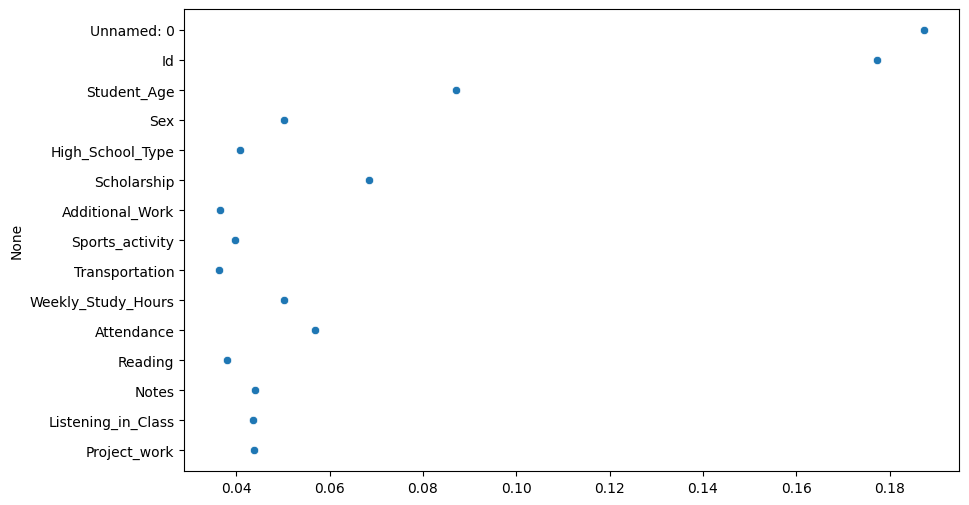

In [10]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [13]:
new=pd.DataFrame({
    "Unnamed: 0":[0],
    "Id":[5001],
    "Student_Age":[12],
    "Sex":["Male"],
    "High_School_Type":["Other"],
    "Scholarship":["50%"],
    "Additional_Work":["Yes"],
    "Sports_activity":["No"],
    "Transportation":["Private"],
    "Weekly_Study_Hours":[0],
    "Attendance":["Always"],
    "Reading":["Yes"],
    "Notes":["Yes"],
    "Listening_in_Class":["No"],
    "Project_work":["No"],
    
})
for i in new.select_dtypes(include=["object"]):
    new[i]=label.fit_transform(new[i])
pred=model.predict(new)
pred

array([0])